In [8]:
pip install psycopg2


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.2 MB 2.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.2 MB 2.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.2 MB 2.2 MB/s eta 0:00:01
   ------------------------------- -------- 0.9/1.2 MB 2.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.1/1.2 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd 
import pandas.io.sql as sqlio
import psycopg2 as ps
import seaborn as sns
import matplotlib.pyplot as plt


#GENEL SATIŞ ANALİZİ

In [8]:
conn =ps.connect(dbname="projesql",
    host="localhost",
    user="postgres",
    password="cruyff",
    port ="5432")

In [25]:
sql = """select *
from order_details od
join orders o 
on od.order_id = o.order_id"""

In [26]:
df=sqlio.read_sql_query(sql,conn)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13288\3932594056.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=sqlio.read_sql_query(sql,conn)


In [27]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [141]:
df["year"]=df["order_date"].dt.year


In [28]:
df["Total_Sales"]=(df.unit_price*df.quantity)

In [29]:
df

,order_id,product_id,unit_price,quantity,discount,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country,Total_Sales
0,10248,11,14.00,12,0.00,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,168.0
1,10248,42,9.80,10,0.00,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,98.0
2,10248,72,34.80,5,0.00,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,174.0
3,10249,14,18.60,9,0.00,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,167.4
4,10249,51,42.40,40,0.00,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,1696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,11077,RATTC,1,1998-05-06,1998-06-03,None,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,66.5
2151,11077,66,17.00,1,0.00,11077,RATTC,1,1998-05-06,1998-06-03,None,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,17.0
2152,11077,73,15.00,2,0.01,11077,RATTC,1,1998-05-06,1998-06-03,None,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,30.0
2153,11077,75,7.75,4,0.00,11077,RATTC,1,1998-05-06,1998-06-03,None,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,31.0


In [138]:
dfs=df.sort_values(by='Total_Sales',ascending = False)

In [142]:
dfs.head(7)

,order_id,product_id,unit_price,quantity,discount,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country,Total_Sales
1620,10865,38,263.50,60,0.05,10865,QUICK,2,1998-02-02,1998-02-16,1998-02-12,1,348.14,QUICK-Stop,Taucherstraße 10,Cunewalde,None,01307,Germany,15810.0
1893,10981,38,263.50,60,0.00,10981,HANAR,1,1998-03-27,1998-04-24,1998-04-02,2,193.37,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,15810.0
1678,10889,38,263.50,40,0.00,10889,RATTC,9,1998-02-16,1998-03-16,1998-02-23,3,280.61,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA,10540.0
281,10353,38,210.80,50,0.20,10353,PICCO,7,1996-11-13,1996-12-11,1996-11-25,3,360.63,Piccolo und mehr,Geislweg 14,Salzburg,None,5020,Austria,10540.0
449,10417,38,210.80,50,0.00,10417,SIMOB,4,1997-01-16,1997-02-13,1997-01-28,3,70.29,Simons bistro,Vinbæltet 34,Kobenhavn,None,1734,Denmark,10540.0
471,10424,38,210.80,49,0.20,10424,MEREP,7,1997-01-23,1997-02-20,1997-01-27,2,370.61,Mère Paillarde,43 rue St. Laurent,Montréal,Québec,H1J 1C3,Canada,10329.2
1698,10897,29,123.79,80,0.00,10897,HUNGO,3,1998-02-19,1998-03-19,1998-02-25,2,603.54,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,Co. Cork,None,Ireland,9903.2


In [31]:
row=df[df['product_id']==76]
print(row)

      order_id  product_id  unit_price  quantity  discount  order_id  \
54       10267          76        14.4        15      0.15     10267   
69       10273          76        14.4        33      0.05     10273   
186      10318          76        14.4         6      0.00     10318   
189      10319          76        14.4        30      0.00     10319   
257      10343          76        14.4        15      0.00     10343   
310      10363          76        14.4        12      0.00     10363   
403      10399          76        14.4        35      0.00     10399   
441      10413          76        14.4        14      0.00     10413   
474      10425          76        14.4        20      0.25     10425   
492      10434          76        14.4        18      0.15     10434   
606      10475          76        14.4        42      0.15     10475   
751      10530          76        18.0        50      0.00     10530   
853      10566          76        18.0        10      0.00     1

In [23]:
df["ship_country"].value_counts()[:10]

ship_country
USA          352
Germany      328
Brazil       203
France       184
UK           135
Austria      125
Venezuela    118
Sweden        97
Canada        75
Mexico        72
Name: count, dtype: int64

In [82]:
print(df.dtypes)

order_id                     int64
product_id                   int64
unit_price                 float64
quantity                     int64
discount                   float64
order_id                     int64
customer_id                 object
employee_id                  int64
order_date          datetime64[ns]
required_date               object
shipped_date        datetime64[ns]
ship_via                     int64
freight                    float64
ship_name                   object
ship_address                object
ship_city                   object
ship_region                 object
ship_postal_code            object
ship_country                object
year                         int32
Total_Sales                float64
dtype: object


In [137]:
df[["Total_Sales","ship_country"]].head

<bound method NDFrame.head of       Total_Sales ship_country
0           168.0       France
1            98.0       France
2           174.0       France
3           167.4      Germany
4          1696.0      Germany
...           ...          ...
2150         66.5          USA
2151         17.0          USA
2152         30.0          USA
2153         31.0          USA
2154         26.0          USA

[2155 rows x 2 columns]>

In [58]:
total_sales_france=df.loc[df["ship_country"]=="France", "Total_Sales"].sum()

In [59]:
print (total_sales_france)

85498.76


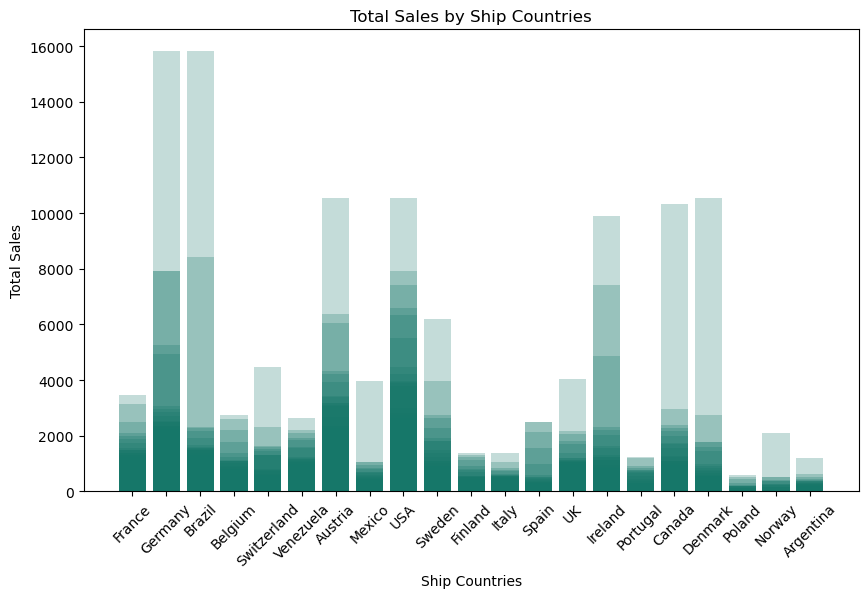

In [154]:
x=df.ship_country
y=df.Total_Sales
plt.figure(figsize=(10, 6))
bars = plt.bar(df['ship_country'], df['Total_Sales'], color='#16776940')
plt.xlabel('Ship Countries')
plt.ylabel('Total Sales')
plt.title('Total Sales by Ship Countries')
plt.xticks(rotation=45)
plt.show()
               


In [89]:
import datetime as dt

In [99]:
df.isnull().sum()

order_id            0
product_id          0
unit_price          0
quantity            0
discount            0
order_id            0
customer_id         0
employee_id         0
order_date          0
required_date       0
shipped_date        0
ship_via            0
freight             0
ship_name           0
ship_address        0
ship_city           0
ship_region         0
ship_postal_code    0
ship_country        0
year                0
Total_Sales         0
dtype: int64

In [98]:
df=df.dropna()

In [90]:
df['shipped_date'] = pd.to_datetime(df['shipped_date'])

In [94]:
snapshot_date=max(df.shipped_date) + dt.timedelta(days=1)

In [79]:
df.columns

Index(['order_id', 'product_id', 'unit_price', 'quantity', 'discount',
       'order_id', 'customer_id', 'employee_id', 'order_date', 'required_date',
       'shipped_date', 'ship_via', 'freight', 'ship_name', 'ship_address',
       'ship_city', 'ship_region', 'ship_postal_code', 'ship_country', 'year',
       'Total_Sales'],
      dtype='object')

In [37]:
merged_table=pd.merge(df,df1, on='product_id', how='inner')
merged_table

,order_id,product_id,unit_price,quantity,discount,order_id,customer_id,employee_id,order_date,required_date,...,ship_address,ship_city,ship_region,ship_postal_code,ship_country,Total_Sales,category_id,category_name,product_name,dairy_products
0,10248,72,34.80,5,0.00,10248,VINET,5,1996-07-04,1996-08-01,...,59 rue de l'Abbaye,Reims,None,51100,France,174.0,4,Dairy Products,Queso Cabrales,Dairy Products
1,10248,72,34.80,5,0.00,10248,VINET,5,1996-07-04,1996-08-01,...,59 rue de l'Abbaye,Reims,None,51100,France,174.0,4,Dairy Products,Queso Manchego La Pastora,Dairy Products
2,10248,72,34.80,5,0.00,10248,VINET,5,1996-07-04,1996-08-01,...,59 rue de l'Abbaye,Reims,None,51100,France,174.0,4,Dairy Products,Gorgonzola Telino,Dairy Products
3,10248,72,34.80,5,0.00,10248,VINET,5,1996-07-04,1996-08-01,...,59 rue de l'Abbaye,Reims,None,51100,France,174.0,4,Dairy Products,Mascarpone Fabioli,Dairy Products
4,10248,72,34.80,5,0.00,10248,VINET,5,1996-07-04,1996-08-01,...,59 rue de l'Abbaye,Reims,None,51100,France,174.0,4,Dairy Products,Geitost,Dairy Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,11077,64,33.25,2,0.03,11077,RATTC,1,1998-05-06,1998-06-03,...,2817 Milton Dr.,Albuquerque,NM,87110,USA,66.5,5,Grains/Cereals,Singaporean Hokkien Fried Mee,NaN
2383,11077,64,33.25,2,0.03,11077,RATTC,1,1998-05-06,1998-06-03,...,2817 Milton Dr.,Albuquerque,NM,87110,USA,66.5,5,Grains/Cereals,Filo Mix,NaN
2384,11077,64,33.25,2,0.03,11077,RATTC,1,1998-05-06,1998-06-03,...,2817 Milton Dr.,Albuquerque,NM,87110,USA,66.5,5,Grains/Cereals,Gnocchi di nonna Alice,NaN
2385,11077,64,33.25,2,0.03,11077,RATTC,1,1998-05-06,1998-06-03,...,2817 Milton Dr.,Albuquerque,NM,87110,USA,66.5,5,Grains/Cereals,Ravioli Angelo,NaN


In [10]:
sql1 = """select * from urunler"""

In [11]:
df1=sqlio.read_sql_query(sql1,conn)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13288\464055242.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1=sqlio.read_sql_query(sql1,conn)


In [35]:
df1=df1.drop('total_value',axis=1)

In [36]:
df1


,category_id,category_name,product_name,product_id,dairy_products
0,1,Beverages,Chai,76,NaN
1,1,Beverages,Chang,76,NaN
2,2,Condiments,Aniseed Syrup,77,NaN
3,2,Condiments,Chef Anton's Cajun Seasoning,77,NaN
4,2,Condiments,Chef Anton's Gumbo Mix,77,NaN
...,...,...,...,...,...
72,8,Seafood,Röd Kaviar,73,NaN
73,7,Produce,Longlife Tofu,74,NaN
74,1,Beverages,Rhönbräu Klosterbier,76,NaN
75,1,Beverages,Lakkalikööri,76,NaN


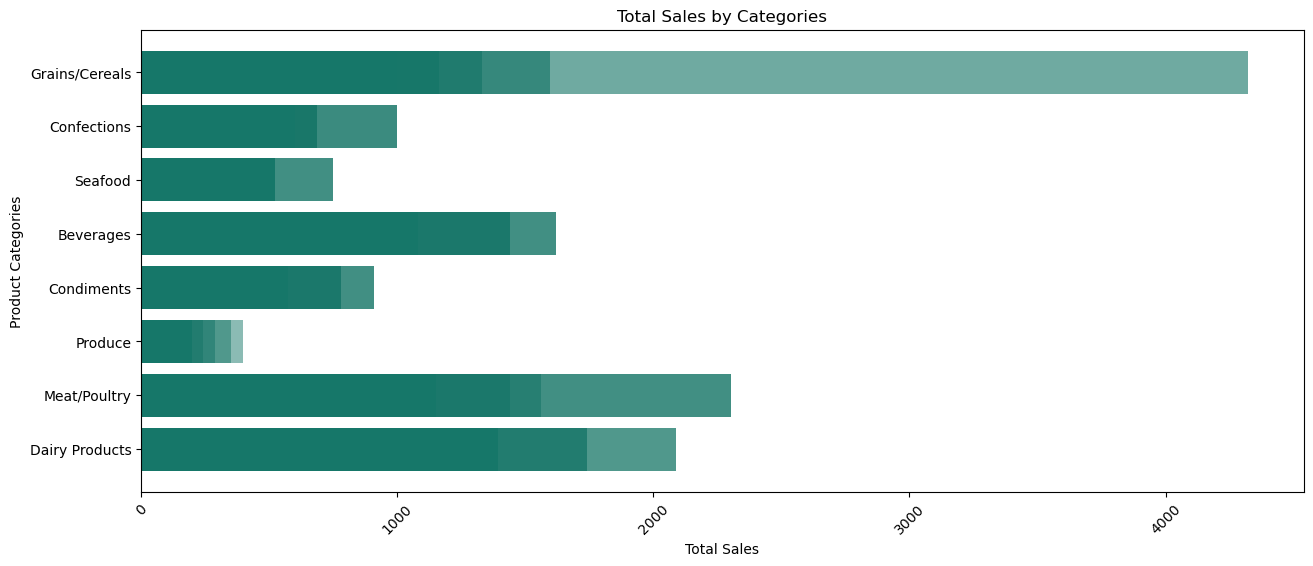

In [39]:
x= merged_table.Total_Sales
y= merged_table.category_name
plt.figure(figsize=(15, 6))
bars = plt.barh(merged_table['category_name'], merged_table['Total_Sales'], color='#16776920')
plt.xlabel('Total Sales')
plt.ylabel('Product Categories')
plt.title('Total Sales by Categories')
plt.xticks(rotation=45)
plt.show()

In [9]:
sql2 ="""select category_name, count(*) as
product_name
from urunler
group by category_name"""

In [188]:
df2=sqlio.read_sql_query(sql2,conn)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7172\2083496993.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2=sqlio.read_sql_query(sql2,conn)


In [189]:
df2


,category_name,product_name
0,Beverages,12
1,Produce,5
2,Condiments,12
3,Grains/Cereals,7
4,Meat/Poultry,6
5,Confections,13
6,Dairy Products,10
7,Seafood,12


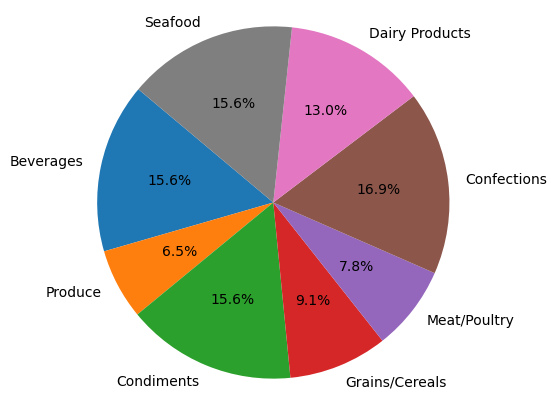

In [204]:

plt.figure(figsize=(5, 5))
plt.pie(df2['product_name'],
        labels=df2['category_name'],
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [202]:
print(df2.dtypes)

category_name    object
product_name      int64
dtype: object


In [41]:
merged_table["grains_cereals"]=merged_table[merged_table.category_name =="Grains/Cereals"].category_name

In [76]:
gc=[merged_table[["grains_cereals","product_name","Total_Sales"]].dropna()]

In [77]:
gc

[      grains_cereals                   product_name  Total_Sales
 2177  Grains/Cereals            Gustaf's Knäckebröd        239.4
 2178  Grains/Cereals                       Tunnbröd        239.4
 2179  Grains/Cereals  Singaporean Hokkien Fried Mee        239.4
 2180  Grains/Cereals                       Filo Mix        239.4
 2181  Grains/Cereals         Gnocchi di nonna Alice        239.4
 ...              ...                            ...          ...
 2382  Grains/Cereals  Singaporean Hokkien Fried Mee         66.5
 2383  Grains/Cereals                       Filo Mix         66.5
 2384  Grains/Cereals         Gnocchi di nonna Alice         66.5
 2385  Grains/Cereals                 Ravioli Angelo         66.5
 2386  Grains/Cereals      Wimmers gute Semmelknödel         66.5
 
 [210 rows x 3 columns]]

GENEL SATIŞ ANALİZİ CASE 2

In [96]:
sql3= """select ship_country, product_name,
sum(quantity * unit_price) as total_sales
from products_orders
group by ship_country, product_name
order by ship_country, total_sales
desc;"""
                            

In [97]:
df3=sqlio.read_sql_query(sql3,conn)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13288\2607272396.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3=sqlio.read_sql_query(sql3,conn)


In [98]:
df3

,ship_country,product_name,total_sales
0,Argentina,Sir Rodney's Marmalade,1620.000000
1,Argentina,Queso Cabrales,630.000000
2,Argentina,Côte de Blaye,527.000000
3,Argentina,Chef Anton's Gumbo Mix,427.000008
4,Argentina,Ravioli Angelo,390.000000
...,...,...,...
931,Venezuela,Longlife Tofu,240.000000
932,Venezuela,Gula Malacca,194.500008
933,Venezuela,Guaraná Fantástica,175.500000
934,Venezuela,Tourtière,148.999996


In [99]:
brz=df3[df3['ship_country']=='Brazil']

In [101]:
brz=brz.sort_values(by='total_sales',ascending = False)

In [133]:
top_10_p=brz.head(10)

In [104]:
brz.head(10)

,ship_country,product_name,total_sales
128,Brazil,Côte de Blaye,26613.500122
129,Brazil,Camembert Pierrot,6460.000084
130,Brazil,Gnocchi di nonna Alice,4711.999989
131,Brazil,Raclette Courdavault,4015.000000
132,Brazil,Ipoh Coffee,3956.000000
133,Brazil,Carnarvon Tigers,3312.500000
134,Brazil,Manjimup Dried Apples,3052.800056
135,Brazil,Northwoods Cranberry Sauce,2800.000000
136,Brazil,Ikura,2790.000000
137,Brazil,Nord-Ost Matjeshering,2511.329941


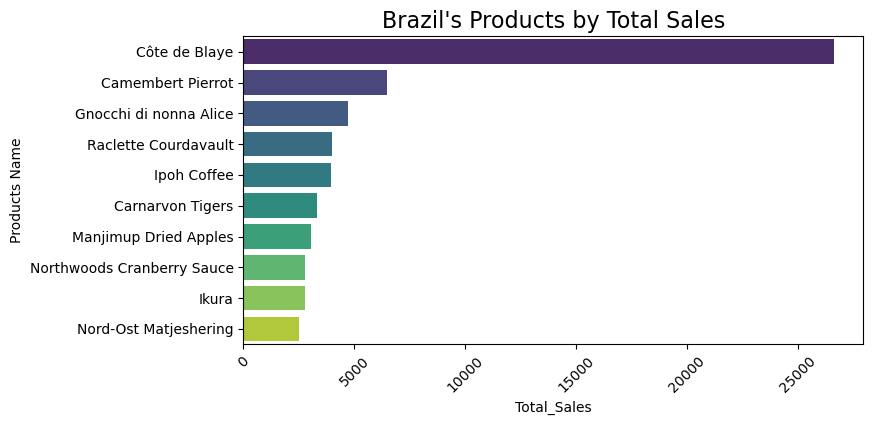

In [134]:
plt.figure(figsize=(8, 4))
sns.barplot(x='total_sales',
            y='product_name',
            data=top_10_p,
            palette='viridis')
plt.title("Brazil's Products by Total Sales", fontsize=16)
plt.xlabel('Total_Sales')
plt.ylabel('Products Name')
plt.xticks(rotation=45)
plt.show()

In [124]:
grm=df3[df3['ship_country']=='Germany']

In [125]:
grm=grm.sort_values(by='total_sales',ascending = False)

In [147]:
top_10_pr=grm.head(10)

In [127]:
grm.head(10)

,ship_country,product_name,total_sales
374,Germany,Côte de Blaye,31620.000000
375,Germany,Raclette Courdavault,17039.000000
376,Germany,Camembert Pierrot,13260.000057
377,Germany,Thüringer Rostbratwurst,11883.840088
378,Germany,Tarte au sucre,9936.199989
379,Germany,Manjimup Dried Apples,7791.000061
380,Germany,Wimmers gute Semmelknödel,6350.750032
381,Germany,Gumbär Gummibärchen,6156.539909
382,Germany,Schoggi Schokolade,5794.500160
383,Germany,Boston Crab Meat,5755.999899


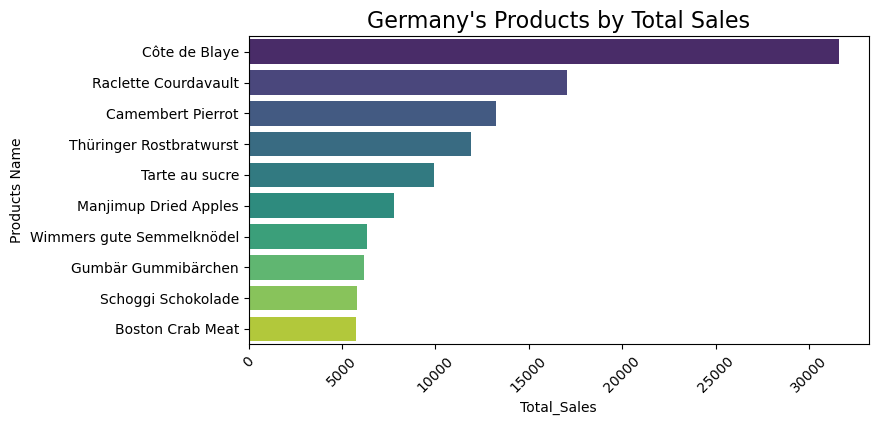

In [136]:
plt.figure(figsize=(8, 4))
sns.barplot(x='total_sales',
            y='product_name',
            data=top_10_pr,
            palette='viridis')
plt.title("Germany's Products by Total Sales", fontsize=16)
plt.xlabel('Total_Sales')
plt.ylabel('Products Name')
plt.xticks(rotation=45)
plt.show()

In [143]:
dnm=df3[df3['ship_country']=='Denmark']

In [144]:
dnm=dnm.sort_values(by='total_sales',ascending = False)

In [148]:
top_10_prd=dnm.head(10)

In [146]:
dnm.head(10)

,ship_country,product_name,total_sales
239,Denmark,Côte de Blaye,10540.000153
240,Denmark,Rössle Sauerkraut,2735.999908
241,Denmark,Thüringer Rostbratwurst,1782.000000
242,Denmark,Vegie-spread,1756.000061
243,Denmark,Manjimup Dried Apples,1590.000000
244,Denmark,Pâté chinois,1440.000000
245,Denmark,Raclette Courdavault,1386.000000
246,Denmark,Ikura,1333.000000
247,Denmark,Boston Crab Meat,1213.999977
248,Denmark,Original Frankfurter grüne Soße,1167.399979


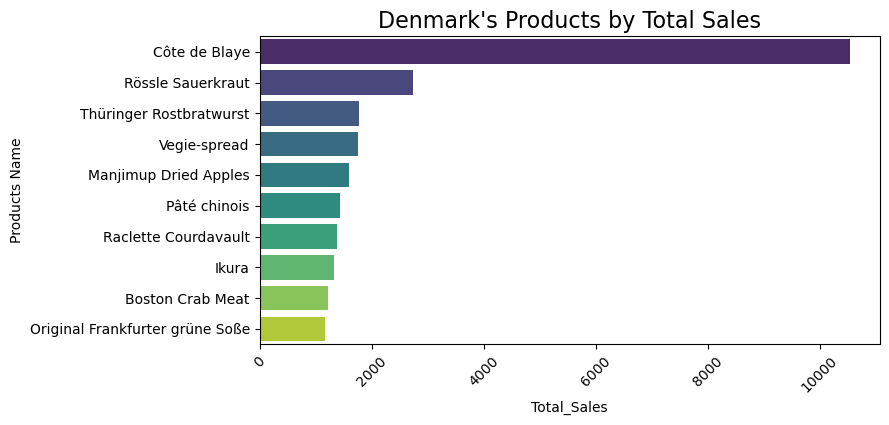

In [149]:
plt.figure(figsize=(8, 4))
sns.barplot(x='total_sales',
            y='product_name',
            data=top_10_prd,
            palette='viridis')
plt.title("Denmark's Products by Total Sales", fontsize=16)
plt.xlabel('Total_Sales')
plt.ylabel('Products Name')
plt.xticks(rotation=45)
plt.show()